In [118]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib
import matplotlib.pyplot as plt


In [119]:
data = pd.read_excel(r"C:\Users\smohn\OneDrive\Desktop\capstone\2 week.xlsx")
data

,Temperature,Humidity,predict
0,24.0,22.0,0
1,24.0,22.0,0
2,24.0,22.0,0
3,24.0,22.0,0
4,24.0,22.0,0
...,...,...,...
4564,20.1,31.0,1
4565,20.1,31.0,1
4566,20.1,31.0,1
4567,20.1,31.0,1


In [120]:
data = data.drop_duplicates()
data

,Temperature,Humidity,predict
0,24.000000,22.000000,0
5,24.000000,22.050000,0
7,24.000000,22.100000,0
13,24.000000,22.200000,0
14,24.033333,22.200000,0
...,...,...,...
4536,20.100000,30.926667,1
4538,20.100000,30.945000,1
4542,20.100000,30.972500,1
4544,20.100000,30.978000,1


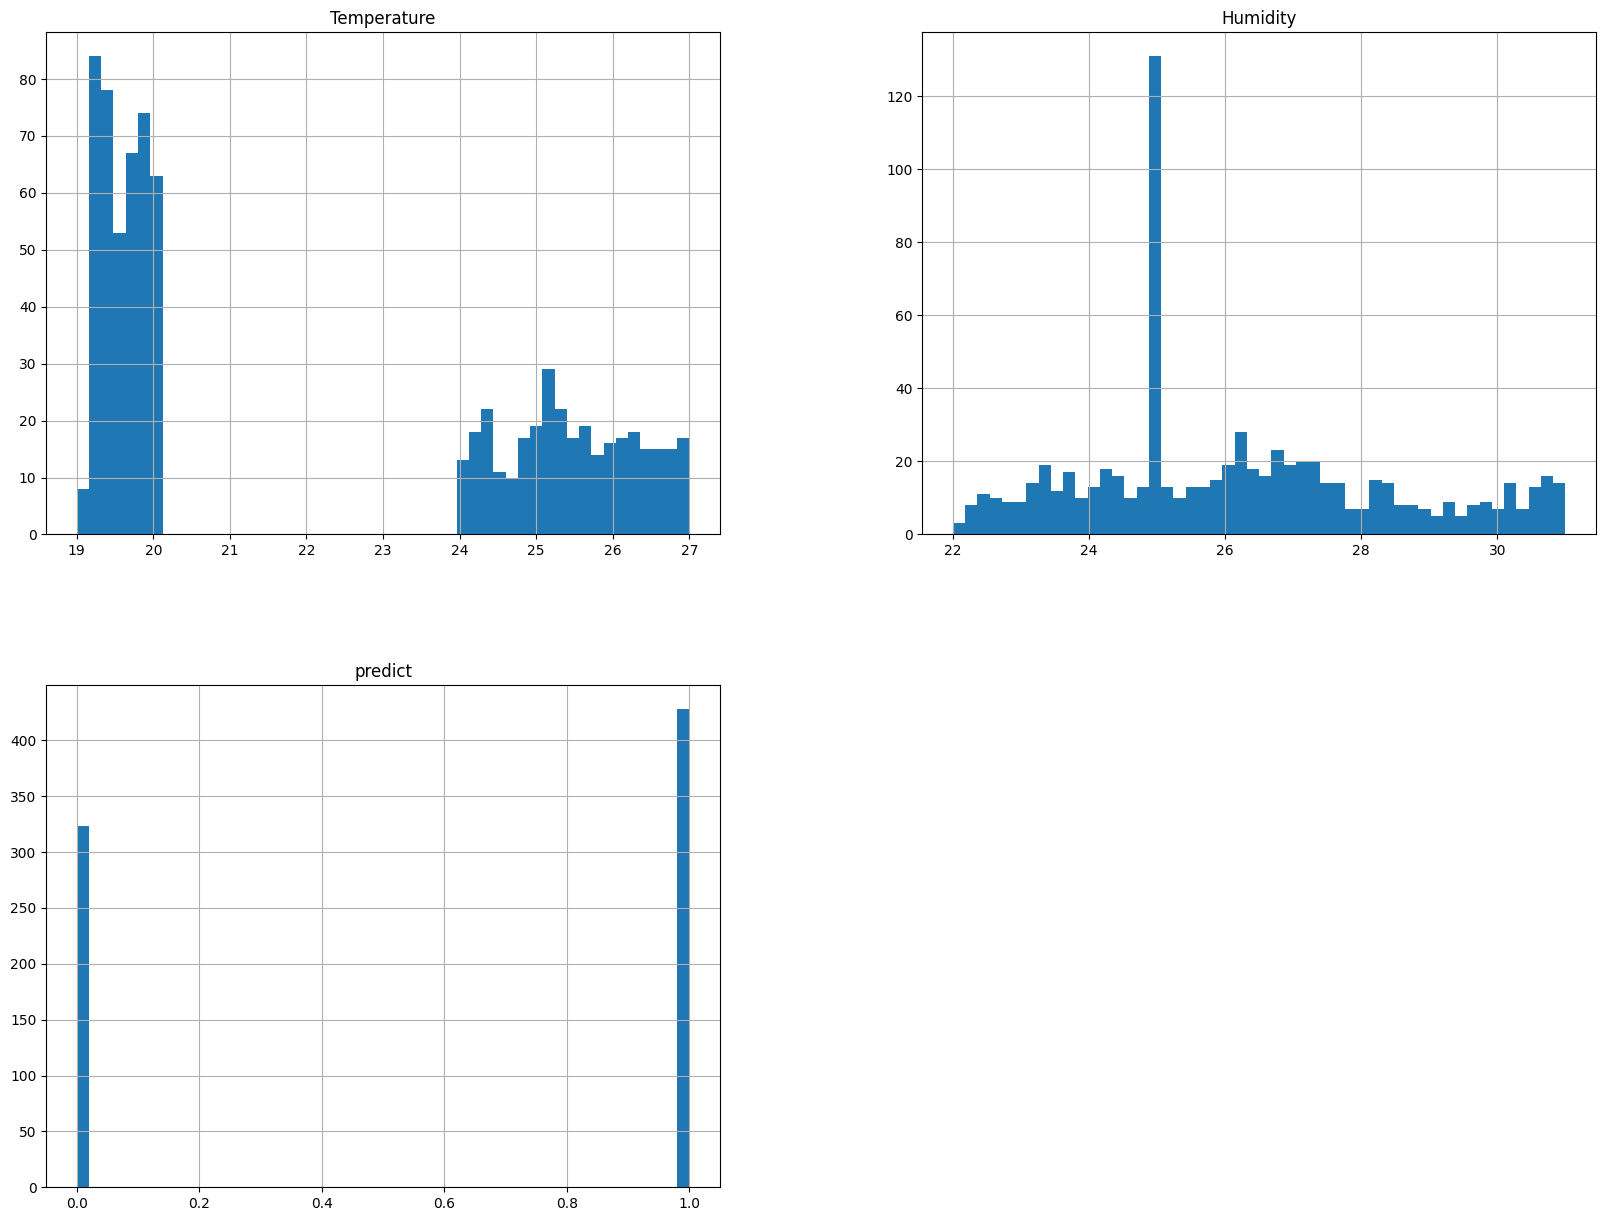

In [121]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [122]:
X = data.drop('predict', axis=1)
Y = data['predict']

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=42)

In [124]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [125]:
Y_predict = model.predict(X_test)

In [126]:
mse = mean_squared_error(Y_test, Y_predict)

In [127]:
print("Mean squard error = ", mse)

Mean squard error =  0.005402388175580457


In [128]:
joblib.dump(model, r"C:\Users\smohn\OneDrive\Desktop\capstone\week(2).h5")

['C:\\Users\\smohn\\OneDrive\\Desktop\\capstone\\week(2).h5']

In [129]:
def predict_tem_hum(model, features):
    input_data = pd.DataFrame([features], columns=X.columns)
    predict_tem = model.predict(input_data)
    return predict_tem

In [131]:
user_input = {}
for column in X.columns:
    user_input[column] = float(input(f"Enter {column}: "))
    print('Predict tem: ', predict_tem[0])
predict_tem = predict_tem_hum(model, user_input)
print('Predict  hum: ', predict_tem[0])
print('Predict tem and hum: ', predict_tem[0])

Enter Temperature: 30
Predict tem:  -0.06863879147803775
Enter Humidity: 28
Predict tem:  -0.06863879147803775
Predict  hum:  -0.43014867211716323
Predict tem and hum:  -0.43014867211716323
